1.no feature selction done 
2.no outlier  treatment


In [1]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,5)

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA



# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000



In [2]:
df=pd.read_csv("D:\python\credit_card.csv")

In [3]:
a=['address', 'age', 'bfast', 'birthmonth', 'callid', 'callwait', 'card2tenure', 'cardtenure', 'cartype', 'commutebike', 'commutebus', 'commutecar', 'commutecarpool', 'commutecat', 'commutemotorcycle', 'commutenonmotor', 'commutepublic', 'commuterail', 'commutetime', 'commutewalk', 'confer','custid', 'ed', 'employ', 'hourstv', 'lncardmon', 'lncardten', 'lncreddebt', 'lnequipmon', 'lnequipten', 'lninc', 'lnlongmon', 'lnlongten', 'lnothdebt', 'lntollmon', 'lntollten', 'lnwiremon', 'lnwireten', 'longmon', 'longten', 'pets_birds', 'pets_cats', 'pets_dogs', 'pets_freshfish', 'pets_reptiles', 'pets_saltfish', 'pets_small', 'spoused']
col=df.columns.to_list()
imp=list(set(col).difference(a))
df=df[imp]
df=df.replace('#NULL!',np.NaN)

In [4]:
df['townsize']=df.townsize.astype('float')
df['cardten']=df.cardten.astype(float)

In [5]:
df['total_spend']=df['cardspent']+df['card2spent']
df.drop(['cardspent','card2spent'], axis=1, inplace=True)

In [6]:
categorical_col = []
numeric_col=[]
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_col.append(column)
    else:
        numeric_col.append(column)

In [11]:
from scipy import stats

ValueError: array must not contain infs or NaNs

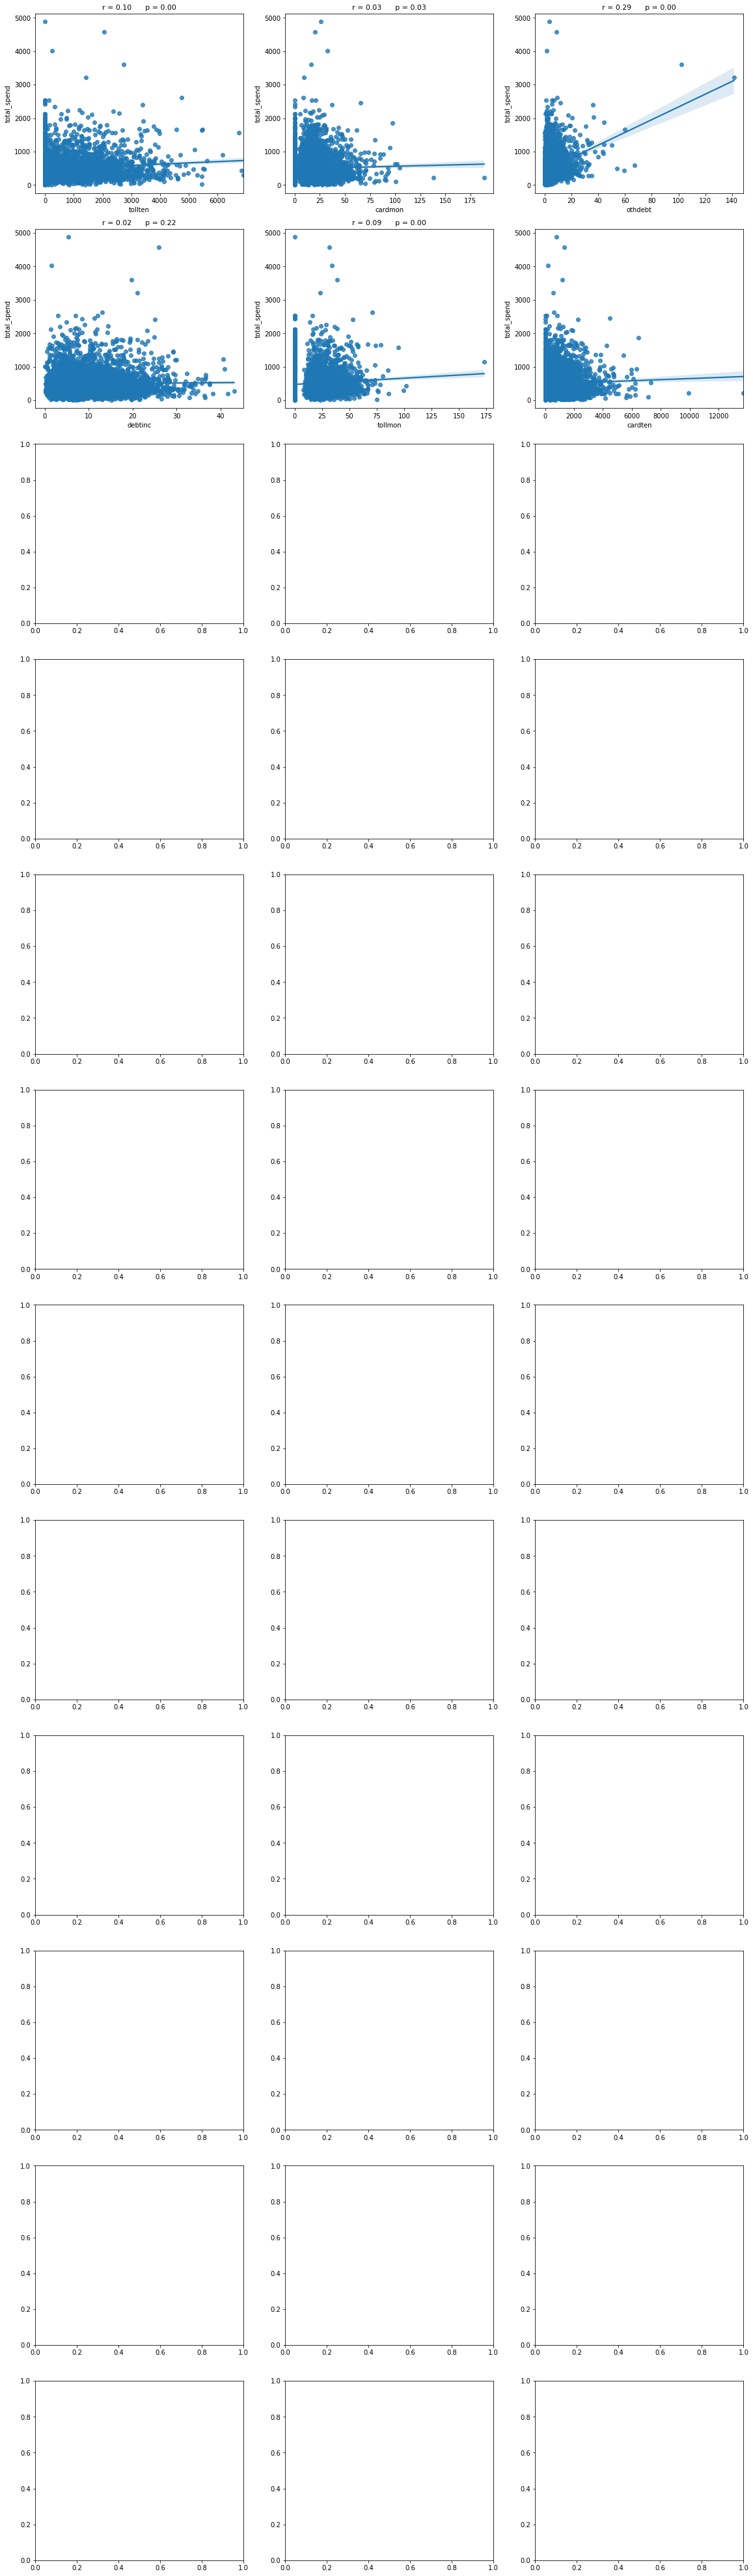

In [13]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*6.5,nr_rows*6))

li_num_feats = list(numeric_col)
li_not_plot = [ 'total_spend']
li_plot_num_feats = [c for c in list(numeric_col) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df[li_plot_num_feats[i]], df['total_spend'], ax = axs[r][c])
            stp = stats.pearsonr(df[li_plot_num_feats[i]], df['total_spend'])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

In [7]:
# Find skewed numerical features
skew_features = df[numeric_col].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 14 numerical features with Skew > 0.5 :


creddebt       11.115714
othdebt         7.587665
income          5.177662
wireten         3.303212
total_spend     2.706735
equipten        2.214284
tollten         2.089243
wiremon         1.997414
cardmon         1.687147
carvalue        1.473584
dtype: float64

In [8]:
df.drop(['equipmon'], axis=1, inplace=True)

In [9]:
df.telecommute.value_counts()

0.0    4060
1.0     940
Name: telecommute, dtype: int64